In [1]:
import numpy as np
from mtalg.random import MultithreadedRNG
import pickle
from tqdm import tqdm
# import cupy as cp
import seaborn as sns
from scipy.stats import multivariate_t
from scipy.stats import trim_mean
import pandas as pd
import torch
import matplotlib.pyplot as plt
from matplotlib import cm
import Other_Mean_Algs as OMA
viridis = cm.get_cmap('viridis', 8)
import PD_Median_Functions_opt_for_sims

C:\Users\12RAM\AppData\Local\Temp\ipykernel_22616\2537152353.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 8)


In [2]:
#Number of runs in the experiment
num_runs=50
#sample size
ndata=50000

In [3]:
def experiment(run_number,d,ndata,data_type,rho):
        # only use 1 thread because we are on the gpu
    # mrng = MultithreadedRNG(seed=run_number, num_threads=1)
    ####################################################################
    # load in data, unit vectors and starting value
    with open("data/data_set_"+data_type+"_"+str(run_number)+".pickle",'rb') as file:
        data=pickle.load(file)
    data=data[0:ndata,0:d].copy()
    sm=np.mean(data.copy(),axis=0)
    # print(sm.shape)
    npm=np.linalg.norm(sm)**2
    # Make torch for coinpress
    X=torch.tensor(data.copy()).float()
    # cp_mean= OMA.COINPRESS(X,ndata,d,rho,torch.full((1,d),5),1000*np.sqrt(d),1000*np.sqrt(d))[0]
    cp_mean= OMA.COINPRESS(X,ndata,d,rho,torch.full((1,d),3),1000,10000)[0]
    # print(cp_mean)
    prm=torch.linalg.norm(cp_mean)**2
    return npm,prm.item()
# print(experiment(1,10,ndata,'con',1))
print(experiment(1,10,ndata,'heavy',20))
print(experiment(3,10,ndata,'heavy',20))
# print(experiment(1,2,ndata,'con',3))

(26350.290737205825, 0.007311891298741102)
(26350.290737205825, 0.0077616325579583645)


In [4]:
# d=2
rhos=[0.135450,0.666457,2.09802]
ds=[2,10,20]
dts=['clean','con','heavy']



t_cp={'MSE': np.nan, 'Estimator':'Priv. Mean', r'$\rho$':2,'Dist':'2',r'$d$':2}
t_npmean={'MSE': np.nan, 'Estimator':'Non-Priv. Mean', r'$\rho$':2,'Dist':'2',r'$d$':2}
rows=[]
results1=[]
results2=[]
for dt in dts:
    t_cp['Dist']=t_npmean['Dist']=dt
    for d in ds:
        t_cp[r'$d$']=t_npmean[r'$d$']=d
        for rho in rhos:
            t_cp[r'$\rho$']=t_npmean[r'$\rho$']=rho
            m1=0
            m2=0
            for j in tqdm(range(num_runs)):
                npm,pm=experiment(j,d,50000,dt,rho)
                m1=m1+npm/num_runs
                m2=m2+pm/num_runs
            # res=np.array(results)
            # means=np.mean(res,axis=0)
            print('dist ',dt,', d', d,', rho, ',rho,', mean ',m1,' ',m2)
            t_cp['MSE']=m2
            t_npmean['MSE']=m1
            rows.append(t_cp.copy())
            rows.append(t_npmean.copy())

100%|██████████| 50/50 [00:00<00:00, 65.88it/s]


dist  clean , d 2 , rho,  0.13545 , mean  4.8721888135298096e-05   0.0001163774260653838


100%|██████████| 50/50 [00:00<00:00, 114.17it/s]


dist  clean , d 2 , rho,  0.666457 , mean  4.8721888135298096e-05   4.8437766487836604e-05


100%|██████████| 50/50 [00:00<00:00, 116.21it/s]


dist  clean , d 2 , rho,  2.09802 , mean  4.8721888135298096e-05   4.87327421876671e-05


100%|██████████| 50/50 [00:00<00:00, 87.02it/s]


dist  clean , d 10 , rho,  0.13545 , mean  0.00021113304404094994   0.02061668994472712


100%|██████████| 50/50 [00:00<00:00, 83.38it/s]


dist  clean , d 10 , rho,  0.666457 , mean  0.00021113304404094994   0.0010564009079826065


100%|██████████| 50/50 [00:00<00:00, 82.45it/s]


dist  clean , d 10 , rho,  2.09802 , mean  0.00021113304404094994   0.0009851275140681539


100%|██████████| 50/50 [00:00<00:00, 63.79it/s]


dist  clean , d 20 , rho,  0.13545 , mean  0.0004092509069922288   0.0033607914007734506


100%|██████████| 50/50 [00:00<00:00, 61.91it/s]


dist  clean , d 20 , rho,  0.666457 , mean  0.0004092509069922288   0.0011820705633726902


100%|██████████| 50/50 [00:00<00:00, 61.03it/s]


dist  clean , d 20 , rho,  2.09802 , mean  0.0004092509069922288   0.000838019961374812


100%|██████████| 50/50 [00:00<00:00, 62.58it/s]


dist  con , d 2 , rho,  0.13545 , mean  3.1218597726286994   2.181253776550293


100%|██████████| 50/50 [00:00<00:00, 106.49it/s]


dist  con , d 2 , rho,  0.666457 , mean  3.1218597726286994   2.144789516925812


100%|██████████| 50/50 [00:00<00:00, 104.15it/s]


dist  con , d 2 , rho,  2.09802 , mean  3.1218597726286994   2.0494064855575562


100%|██████████| 50/50 [00:00<00:00, 79.08it/s]


dist  con , d 10 , rho,  0.13545 , mean  15.621810308498688   14.71409718513489


100%|██████████| 50/50 [00:00<00:00, 72.52it/s]


dist  con , d 10 , rho,  0.666457 , mean  15.621810308498688   7.948424348831177


100%|██████████| 50/50 [00:00<00:00, 70.81it/s]


dist  con , d 10 , rho,  2.09802 , mean  15.621810308498688   7.611875047683717


100%|██████████| 50/50 [00:00<00:00, 58.44it/s]


dist  con , d 20 , rho,  0.13545 , mean  31.238710780234644   30.745119590759273


100%|██████████| 50/50 [00:00<00:00, 55.74it/s]


dist  con , d 20 , rho,  0.666457 , mean  31.238710780234644   26.356379261016844


100%|██████████| 50/50 [00:00<00:00, 53.76it/s]


dist  con , d 20 , rho,  2.09802 , mean  31.238710780234644   14.252210655212394


100%|██████████| 50/50 [00:00<00:00, 57.43it/s]


dist  heavy , d 2 , rho,  0.13545 , mean  951.8062502185799   0.010171769603621213


100%|██████████| 50/50 [00:00<00:00, 101.43it/s]


dist  heavy , d 2 , rho,  0.666457 , mean  951.8062502185799   0.004200892495500739


100%|██████████| 50/50 [00:00<00:00, 103.19it/s]


dist  heavy , d 2 , rho,  2.09802 , mean  951.8062502185799   0.0037391771539114424


100%|██████████| 50/50 [00:00<00:00, 69.80it/s]


dist  heavy , d 10 , rho,  0.13545 , mean  26350.290737205807   0.038499945607036345


100%|██████████| 50/50 [00:00<00:00, 71.67it/s]


dist  heavy , d 10 , rho,  0.666457 , mean  26350.290737205807   0.016313314670696855


100%|██████████| 50/50 [00:00<00:00, 73.07it/s]


dist  heavy , d 10 , rho,  2.09802 , mean  26350.290737205807   0.01092124280519784


100%|██████████| 50/50 [00:00<00:00, 51.89it/s]


dist  heavy , d 20 , rho,  0.13545 , mean  49906.23383298141   1.3751029746234418


100%|██████████| 50/50 [00:00<00:00, 53.57it/s]


dist  heavy , d 20 , rho,  0.666457 , mean  49906.23383298141   0.03313459254801273


100%|██████████| 50/50 [00:00<00:00, 52.89it/s]

dist  heavy , d 20 , rho,  2.09802 , mean  49906.23383298141   0.019199602007865902


In [5]:
mse_df=pd.DataFrame(rows)
mse_df.head()

,MSE,Estimator,$\rho$,Dist,$d$
0,0.000116,Priv. Mean,0.135450,clean,2
1,0.000049,Non-Priv. Mean,0.135450,clean,2
2,0.000048,Priv. Mean,0.666457,clean,2
3,0.000049,Non-Priv. Mean,0.666457,clean,2
4,0.000049,Priv. Mean,2.098020,clean,2


In [6]:
clean=mse_df[mse_df['Dist']=="clean"]

<Axes: xlabel='$d$', ylabel='MSE'>

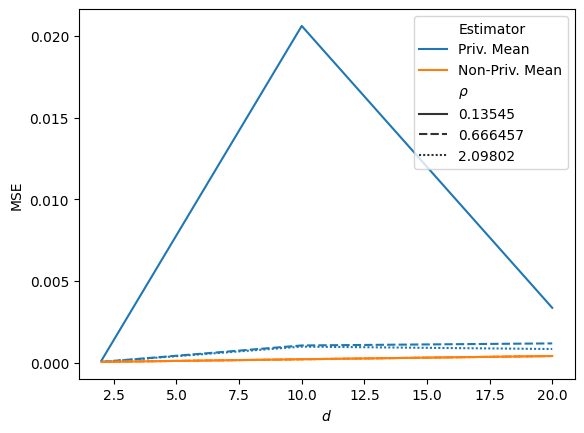

In [7]:
clean

sns.lineplot(x=r'$d$',y="MSE",hue="Estimator",style=r'$\rho$',data=clean)

In [8]:
mse_df[mse_df['Dist']=="heavy"]

,MSE,Estimator,$\rho$,Dist,$d$
36,0.010172,Priv. Mean,0.135450,heavy,2
37,951.806250,Non-Priv. Mean,0.135450,heavy,2
38,0.004201,Priv. Mean,0.666457,heavy,2
39,951.806250,Non-Priv. Mean,0.666457,heavy,2
40,0.003739,Priv. Mean,2.098020,heavy,2
41,951.806250,Non-Priv. Mean,2.098020,heavy,2
42,0.038500,Priv. Mean,0.135450,heavy,10
43,26350.290737,Non-Priv. Mean,0.135450,heavy,10
44,0.016313,Priv. Mean,0.666457,heavy,10
45,26350.290737,Non-Priv. Mean,0.666457,heavy,10


<Axes: xlabel='$d$', ylabel='MSE'>

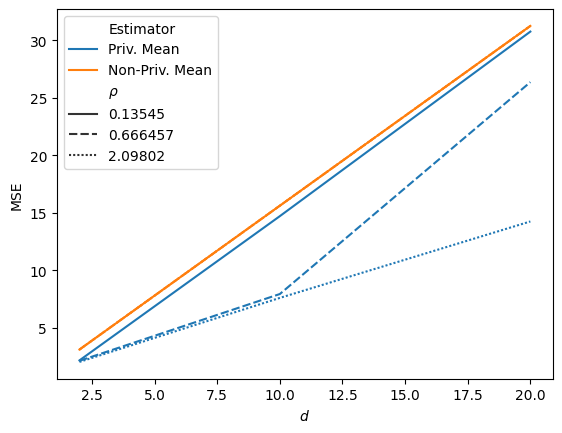

In [9]:
con=mse_df[mse_df['Dist']=="con"]
sns.lineplot(x=r'$d$',y="MSE",hue="Estimator",style=r'$\rho$',data=con)

In [10]:
vals=mse_df[r'$\rho$'].unique()
vals


array([0.13545 , 0.666457, 2.09802 ])

In [11]:

def conv(a):
    if a==vals[0]:
        return 2
    elif a==vals[1]:
        return 5
    else:
        return 10
mse_df2=mse_df
mse_df[r'$\epsilon$']=mse_df[r'$\rho$'].apply(conv)

In [12]:
# mse_df2.columns
mse_df2=mse_df.drop(r'$\rho$',axis=1)
mse_df2.head()

,MSE,Estimator,Dist,$d$,$\epsilon$
0,0.000116,Priv. Mean,clean,2,2
1,0.000049,Non-Priv. Mean,clean,2,2
2,0.000048,Priv. Mean,clean,2,5
3,0.000049,Non-Priv. Mean,clean,2,5
4,0.000049,Priv. Mean,clean,2,10


In [13]:

mse_df2.to_pickle('means_df.pkl')